<a href="https://www.kaggle.com/code/loananh/stock-analysis?scriptVersionId=226937315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

  <Ticker>     <Date>  <Open>  <High>   <Low>  <Close>  <Volume>
0      SSI 2006-12-15  5.9920  8.5600  5.7780   6.8967    293000
1      SSI 2006-12-18  7.2760  7.8067  7.2760   7.8134    340200
2      SSI 2006-12-19  8.3460  8.4530  7.7468   8.4602    326900
3      SSI 2006-12-20  9.2576  9.2576  8.3888   8.3960    651600
4      SSI 2006-12-21  8.5600  8.5600  8.0336   8.0404    200100


<Axes: xlabel='<Date>'>

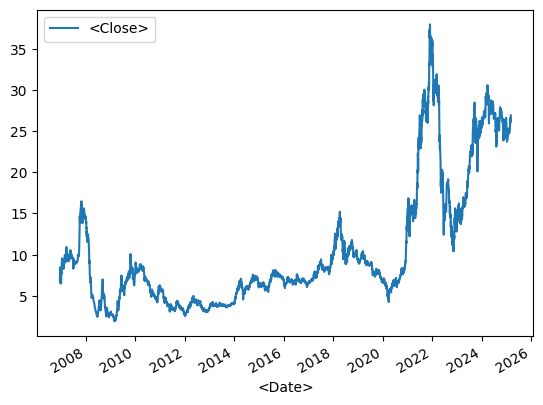

In [1]:
#Prepare Python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load Dataframe
data = pd.read_csv('/kaggle/input/hose-market/CafeF.HSX.Upto07.03.2025.csv')

# Rename column <DTYYYYMMDD> to <Date>
data.rename(columns={'<DTYYYYMMDD>':'<Date>'}, inplace=True)

# Convert <Date> from number to date format
data['<Date>'] = pd.to_datetime(data['<Date>'], format='%Y%m%d')

# Filter stock for analysis, sort date and index in ascending
df = data[data['<Ticker>']=='SSI']
df = df.iloc[::-1]
df = df.reset_index(drop = True, inplace = False)

# Review data
print(df.head())
df.plot(y='<Close>', x='<Date>')

In [2]:
# Get the duration of data set
print("Starting date: ",df.iloc[0]['<Date>'])
print("Ending date: ", df.iloc[-1]['<Date>'])
print("Duration: ", df.iloc[-1]['<Date>'] - df.iloc[0]['<Date>'])

Starting date:  2006-12-15 00:00:00
Ending date:  2025-03-07 00:00:00
Duration:  6657 days 00:00:00


Mean Returns of SSI: 1.0007679053908658
Mean Returns of SSI + 1Std.dev: 1.0303781312438272
Mean Returns of SSI - 1Std.dev: 0.9711576795379044


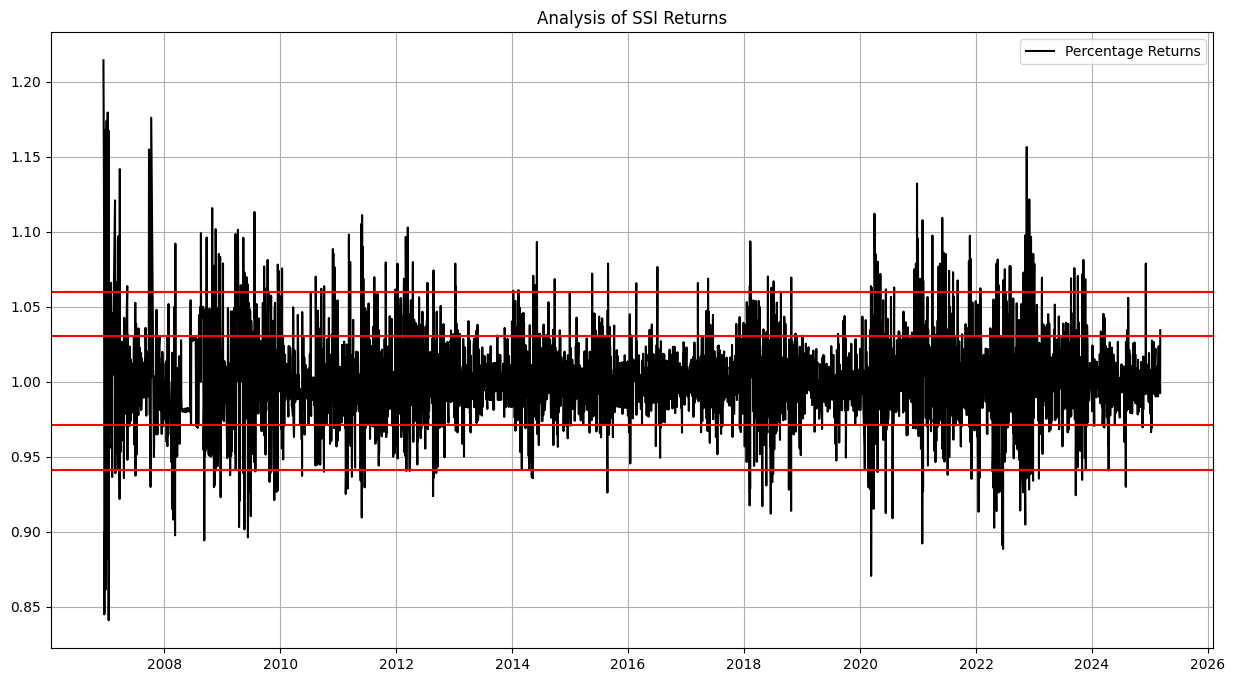

In [3]:
# Basic Metric Analysis 1: Returns Analysis
df['Returns'] = df['<Open>'].shift(-1) / df['<Open>']

# Mean and Standard Deviation of Returns
mean_returns = df['Returns'].mean()
print('Mean Returns of SSI:', mean_returns) #0.06%
std_dev = df['Returns'].std()
print('Mean Returns of SSI + 1Std.dev:', mean_returns+std_dev) #0 and 1.03%
print('Mean Returns of SSI - 1Std.dev:', mean_returns-std_dev) #0 and 0.97%

# Advanced Plot
plt.figure(figsize=(15,8))
plt.title('Analysis of SSI Returns')
plt.plot(df['<Date>'], df['Returns'], color='black', label='Percentage Returns')
plt.axhline(y=mean_returns+(std_dev*2), color='red', linestyle='-')
plt.axhline(y=mean_returns+(std_dev*1), color='red', linestyle='-')
plt.axhline(y=mean_returns-(std_dev*1), color='red', linestyle='-')
plt.axhline(y=mean_returns-(std_dev*2), color='red', linestyle='-')
plt.legend(loc='upper right')
plt.grid()
plt.show()

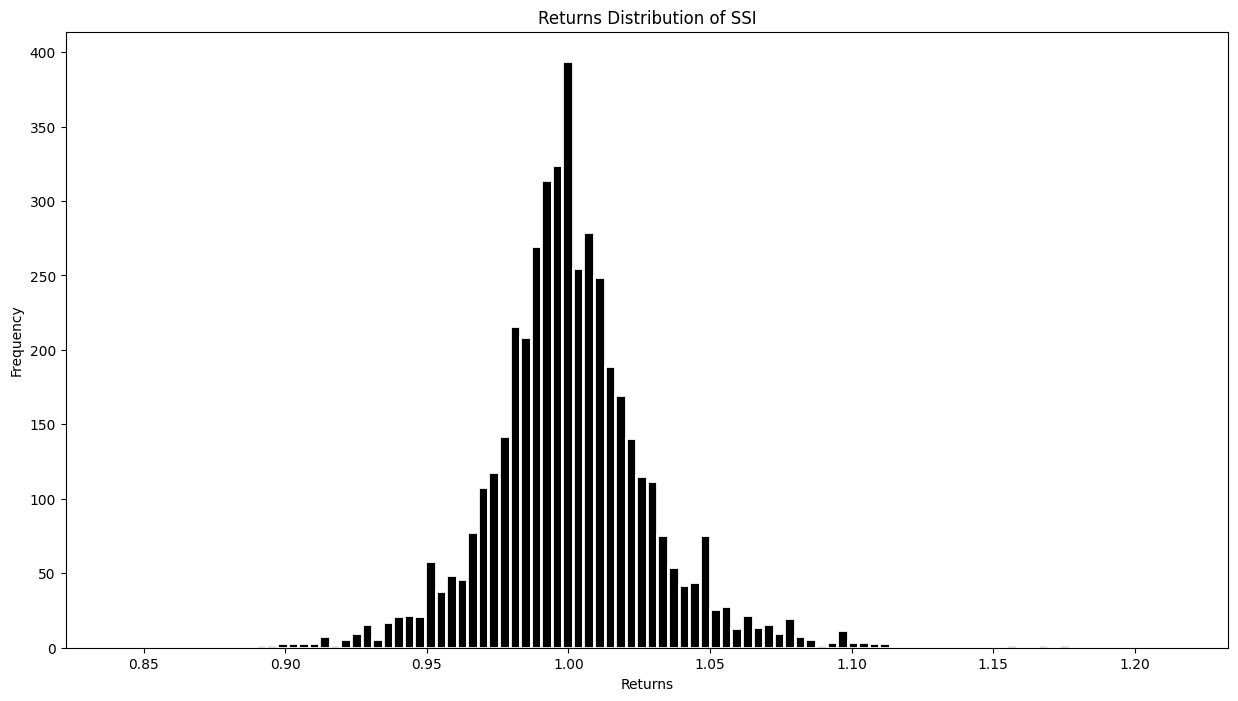

In [4]:
# Basic Metrics Analysis 2: Returns Distribution
plt.figure(figsize=(15,8))
plt.hist(df['Returns'], color='Black', edgecolor='White', linewidth=2, bins=100)
plt.title('Returns Distribution of SSI')
plt.xlabel('Returns', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [5]:
# Basic Metrics Analysis 3: Volatility Scenarios
df['Volatility'] = df['<High>'] / df['<Low>']
high_volatility = np.where(df['Volatility'].shift(1).ge(df['Volatility'].mean()),df['<Close>'] / df['<Open>'],0)
high_volatility = high_volatility[high_volatility != 0]
print('Average next return on High Volatility Scenarios is:', np.mean(high_volatility))

low_volatility = np.where(df['Volatility'].shift(1).lt(df['Volatility'].mean()),df['<Close>'] / df['<Open>'],0)
low_volatility = low_volatility[low_volatility != 0]
print('Average next return on Low Volatility Scenarios is:', np.mean(low_volatility))


Average next return on High Volatility Scenarios is: 0.999548158861105
Average next return on Low Volatility Scenarios is: 0.9990281532685301


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=dad9ee3cb8db2dc136313988cb6fc5dc57d6b4e2251f5bbc6ca51ceed07dc04c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


<Axes: xlabel='<Date>'>

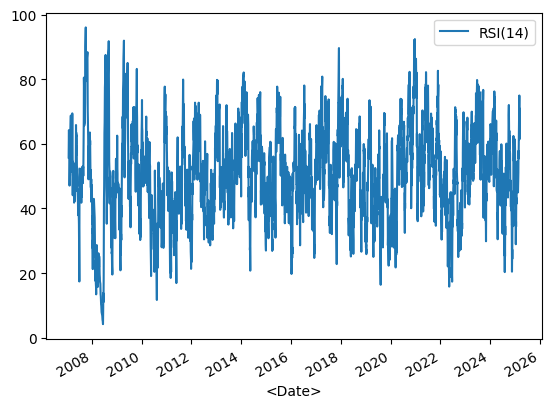

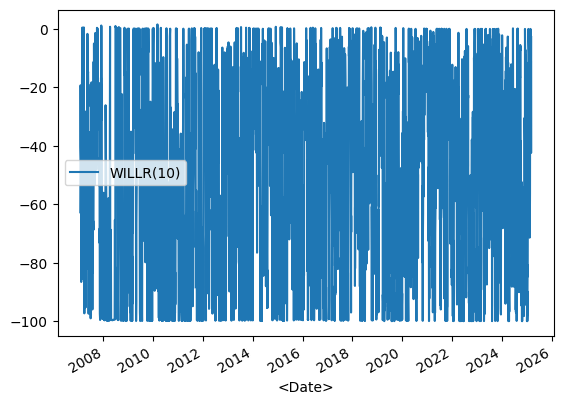

In [6]:
# Technical Analysis Indicators
try:
    import pandas_ta as ta
except:
    !pip install pandas_ta
    import pandas_ta as ta
df['RSI(2)'] = ta.rsi(close=df['<Close>'], length=2)
df['RSI(7)'] = ta.rsi(close=df['<Close>'], length=7)
df['RSI(14)'] = ta.rsi(close=df['<Close>'], length=14)
df['Close / Moving Average (14)'] = df['<Close>'] / ta.sma(close=df['<Close>'], length=14)
df['Close / Moving Average (30)'] = df['<Close>'] / ta.sma(close=df['<Close>'], length=30)
df['WILLR(10)'] = ta.willr(high=df['<High>'], low=df['<Low>'], close=df['<Close>'], length=10)

df = df.dropna()

# Simple plot of indicators
df.plot(y='RSI(14)', x='<Date>')
df.plot(y='WILLR(10)', x='<Date>')

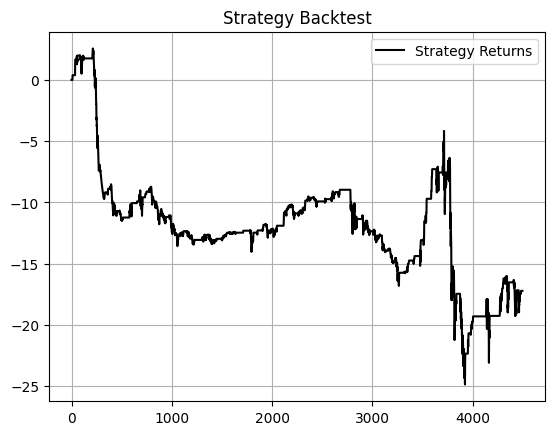

In [7]:
# Simple Backtest
my_strategy = np.where((df['RSI(14)'].lt(50) & df['Close / Moving Average (30)'].lt(0.99)), df['<Open>'].shift(-2) - df['<Open>'].shift(-1), 0)
plt.title('Strategy Backtest')
plt.plot(np.cumsum(my_strategy), color='Black', label='Strategy Returns')
plt.legend(loc='upper right')
plt.grid()
plt.show()                       